# Final Project: Basins of Attraction

**Course:** Numerical Algorithms

**Student:** Samer Haddadin

**Neptun:** JUTYYM

## Objective
The goal of this project is to explore and visualize the **Basins of Attraction** for Newton's Method.

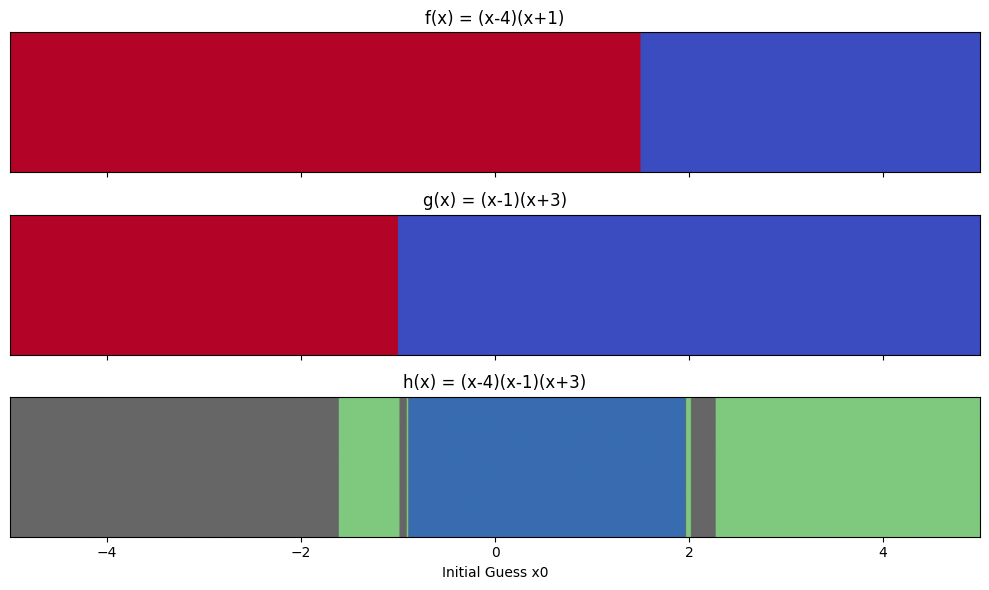

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# CORE SOLVER (Vectorized) (will also be used for part 2)
def newton_method_vectorized(f, df, z0, tol=1e-6, max_iter=50):
    """
    Vectorized Newton's method solver.
    Works for both real (1D) and complex (2D) arrays.
    """
    z = z0.copy()
    for i in range(max_iter):
        derivative = df(z)
        # Prevent division by zero errors on flat spots
        derivative[derivative == 0] = 1e-16
        
        step = f(z) / derivative
        z = z - step
        
        # Run for fixed iterations to keep array shapes consistent
        # and because fractal boundaries are chaotic
    return z

def get_root_indices(final_z, roots, tol=1e-3):
    """Classify final points by which root they converged to."""
    # Initialize with -1
    indices = np.full(final_z.shape, -1, dtype=int)
    for i, r in enumerate(roots):
        indices[np.abs(final_z - r) < tol] = i
    return indices

# PART 1: 1D REAL ANALYSIS

# 1. Define Functions
def f1(x): return (x-4)*(x+1)
def df1(x): return 2*x - 3
r1 = [4, -1]

def f2(x): return (x-1)*(x+3)
def df2(x): return 2*x + 2
r2 = [1, -3]

def f3(x): return (x-4)*(x-1)*(x+3)
def df3(x): return 3*x**2 - 2*x - 11
r3 = [4, 1, -3]

# 2. Setup Domain
# Using 2000 points for a smooth resolution
x_dom = np.linspace(-5, 5, 2000)

# 3. Solve & Classify
# Calculate the final position, then map it to a color index
res1 = get_root_indices(newton_method_vectorized(f1, df1, x_dom), r1)
res2 = get_root_indices(newton_method_vectorized(f2, df2, x_dom), r2)
res3 = get_root_indices(newton_method_vectorized(f3, df3, x_dom), r3)

# 4. Plot
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

ax[0].imshow(res1.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='coolwarm')
ax[0].set_title("f(x) = (x-4)(x+1)")
ax[0].set_yticks([])

ax[1].imshow(res2.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='coolwarm')
ax[1].set_title("g(x) = (x-1)(x+3)")
ax[1].set_yticks([])

ax[2].imshow(res3.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='Accent')
ax[2].set_title("h(x) = (x-4)(x-1)(x+3)")
ax[2].set_yticks([])
ax[2].set_xlabel("Initial Guess x0")

plt.tight_layout()
plt.show()